In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

import sklearn 
import math

from tensorflow import keras
from keras.models import Sequential

#import Ipython 

import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


path = "/Volumes/Adithya KP Main/Adithya KP/5th Sem BE/PW Machine Learning/Data"
genres = os.listdir(os.path.join(path, 'genres_original/'))
print(genres)

['pop', 'Icon\r', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [2]:
amplitude, frequency = librosa.load(f'/Volumes/Adithya KP Main/Adithya KP/5th Sem BE/PW Machine Learning/Data/genres_original/rock/rock.00000.wav')
print(type(amplitude), type(frequency), "\n")
print('amplitude: ', amplitude, '\n')
print('ampitude shape:', np.shape(amplitude), '\n')
print('frequency: ', frequency, '\n')

print('check length of audio: ')

<class 'numpy.ndarray'> <class 'int'> 

amplitude:  [-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ] 

ampitude shape: (661794,) 

frequency:  22050 

check length of audio: 


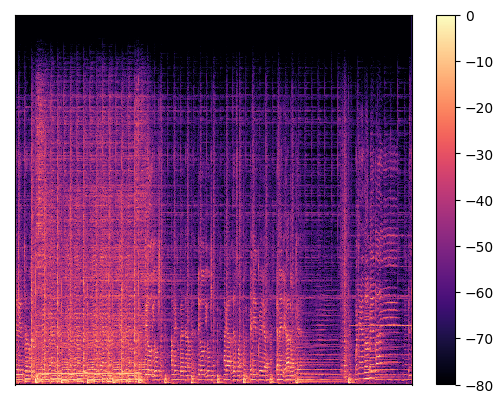

In [ ]:
D = librosa.stft(amplitude)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
plt.figure()
img = librosa.display.specshow(S_db)
plt.colorbar()

In [60]:
audio, b = librosa.effects.trim(amplitude)
print("amplitude: ", amplitude)
print("Duration: ", audio.shape[0]/frequency)
print(len(audio))
#[print([*audio])]
print(b)

amplitude:  [-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ]
Duration:  30.013333333333332
661794
[     0 661794]


In [8]:
print(librosa.get_duration(amplitude), librosa.get_duration(audio))
#checking for gaps in audio

30.013333333333332 30.013333333333332


/var/folders/sp/mym2ff793l77q2m8rh382d880000gn/T/ipykernel_5335/3371313909.py:1: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(amplitude), librosa.get_duration(audio))


In [16]:
import sounddevice as sd
sd.play(amplitude, frequency, blocking = True)


#Ipython.display.Audio(amplitude, rate = frequency)

Text(0.5, 1.0, 'Song 1')

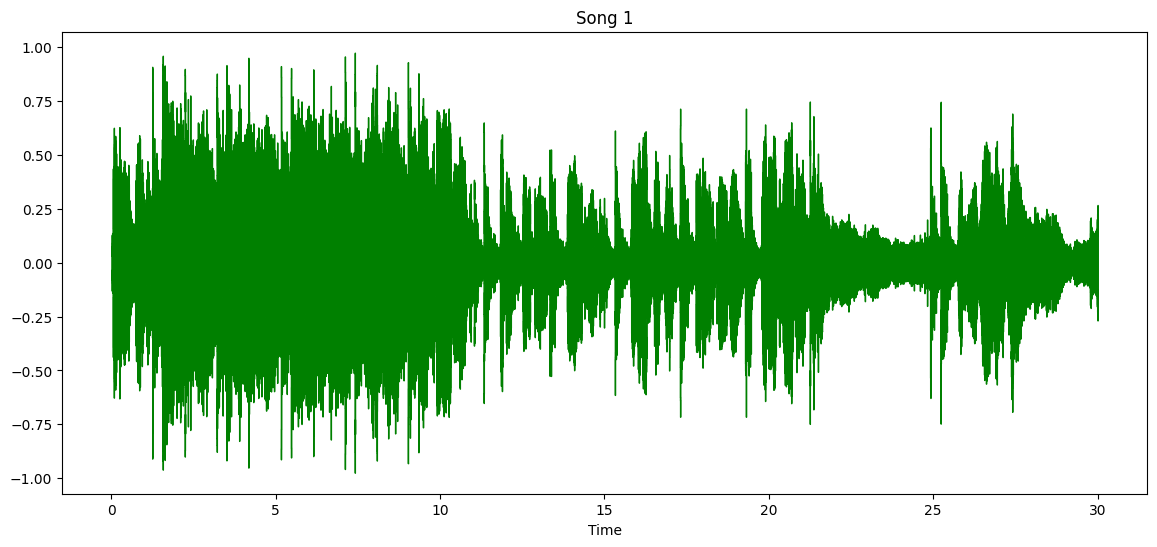

In [17]:
plt.figure(figsize = (14,6))
librosa.display.waveshow(amplitude, color = "green")
plt.title("Song 1")

Applying Fourier transform over the dataset
 - Music waves are the addition of amplitudes of all waves at different frequencies
 - Converison of signal from time domain to frequency domain
 - applying Short-time Fourier transform (STFT)
 - STFT (Short-time Fourier Transform), for multiple DFTs, over short overlapping windows
    - Divide Longer audio signal into shorte segments of equal length
    - compute Fourier transform on each shorter segment.
 - 

Text(0.5, 1.0, 'Song1 after fourier transform')

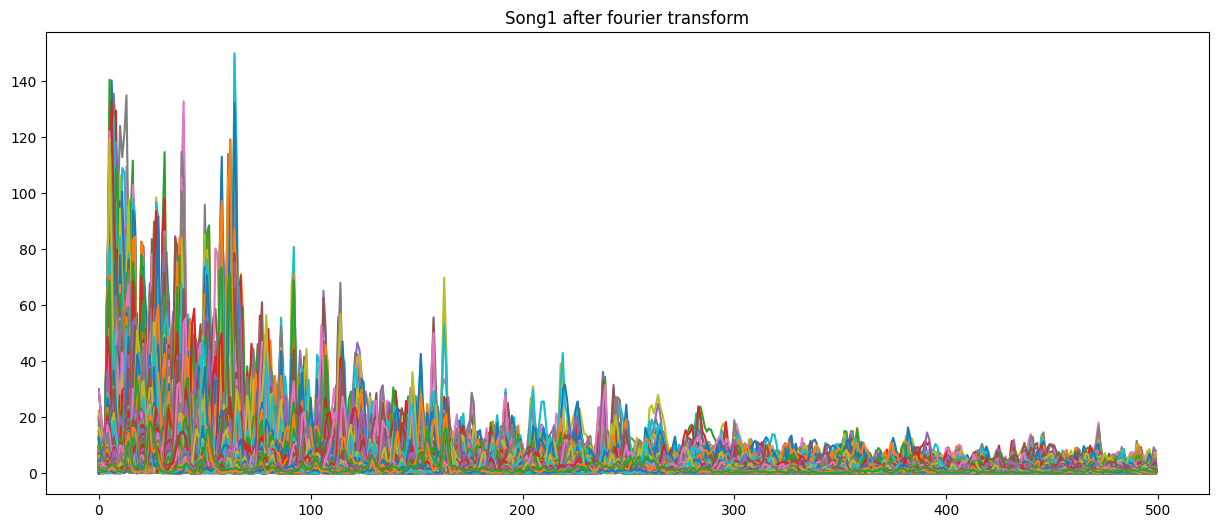

In [19]:

n_fft = 2048
hop_length = 512 #hop_length
win_length = 2048 

aud_ft = np.abs(librosa.stft(amplitude, n_fft = n_fft, hop_length = hop_length, win_length = win_length))
plt.figure(figsize = (15,6))
plt.plot(aud_ft[:500, :]) #stop at 500hz
plt.title("Song1 after fourier transform")

In [21]:
final_data = pd.read_csv("/Volumes/Adithya KP Main/Adithya KP/5th Sem BE/PW Machine Learning/Data/features_3_sec.csv")

In [22]:
final_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


.csv file has 60 columns

In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [24]:
final_data = final_data.drop(labels = "filename", axis = 1)

In [25]:
class_list = final_data.iloc[:, -1]
convertor = LabelEncoder()

Outputs

In [26]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [27]:
print(final_data.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [28]:
fit = StandardScaler()
X = fit.fit_transform(np.array(final_data.iloc[:,:-1], dtype = float))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [67]:
len(X_train)


7992

In [68]:
len(X_test)

1998

In [69]:
def trainModel(model, epochs, optimizer):
    batch_size = 12
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size, verbose = 0)

In [70]:
def plotValidate(history):
    print("Validation Accurqacy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize = (16,6))
    plt.title("Precision Metrics")
    plt.show()

HeatMap

<AxesSubplot: >

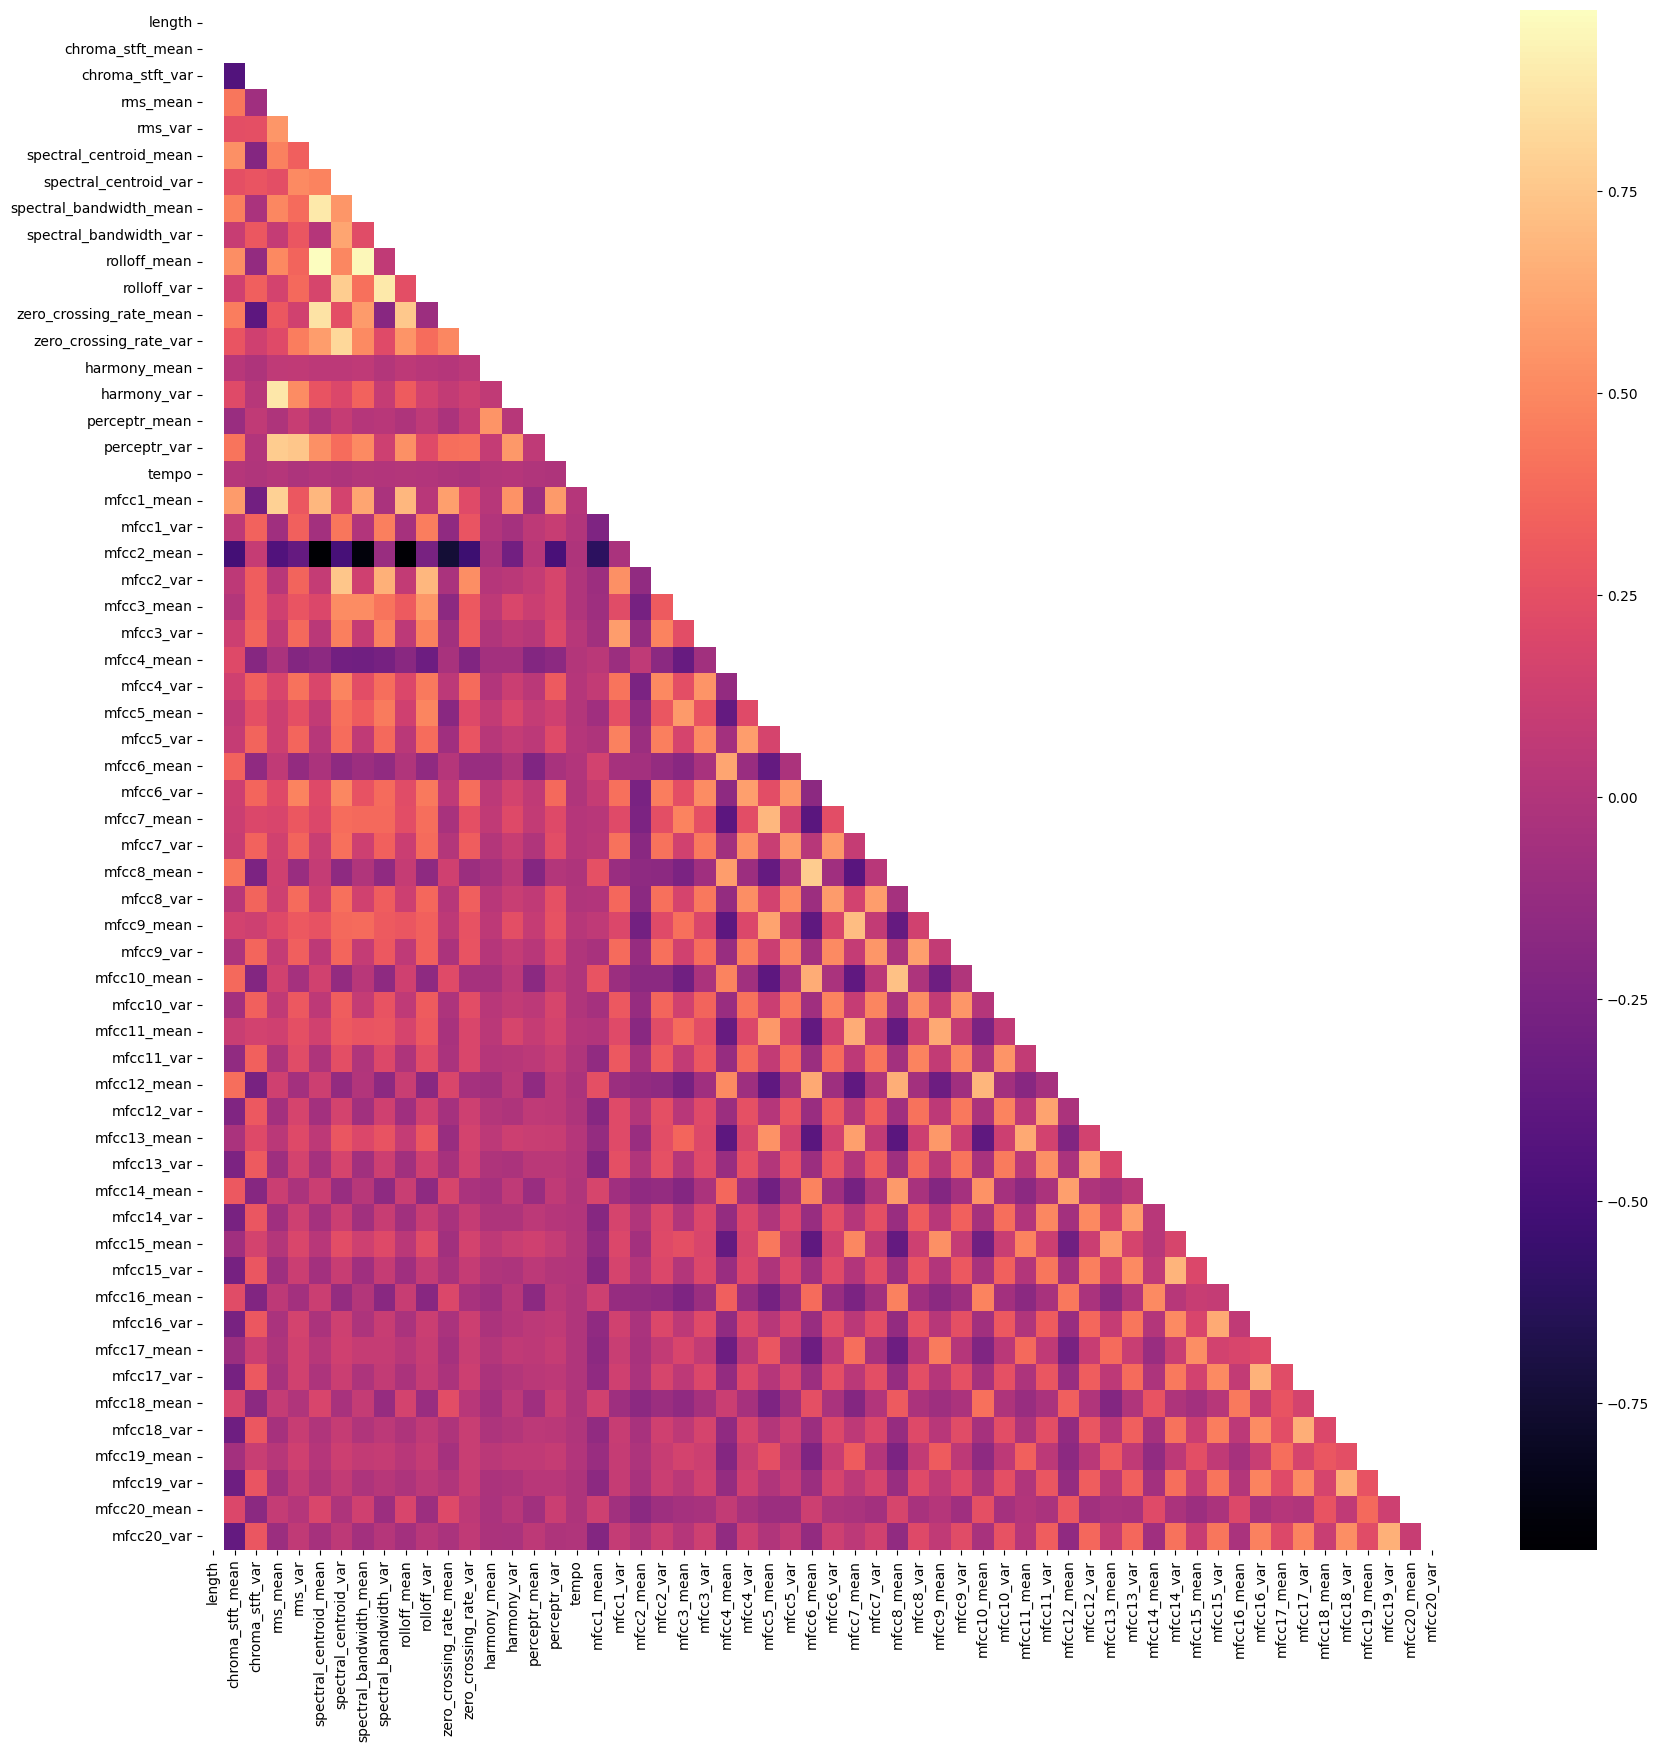

In [37]:
corr = final_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (20,20))
sns.heatmap(corr, mask=mask, cmap = "magma")

ADAM Stochastic Gradient Method
RELU Activation Function : Hidden Layers
Softmax Function (MultiOutput Logistic Regression), arcTan

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation = "relu", input_shape = (X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256,activation = "relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation = "softmax"),
])

print(model.summary())
model_history = trainModel(model = model, epochs = 1650, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

2023-02-03 16:02:14.849373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None


In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size = 128)
print("test loss : ", test_loss)
print("Test accuracy: ", test_accuracy*100,"%")

16/16 [==============================] - 0s 2ms/step - loss: 1.5058 - accuracy: 0.9284
test loss :  1.5057579278945923
Test accuracy:  92.84284114837646 %


Validation Accurqacy 0.9394394159317017


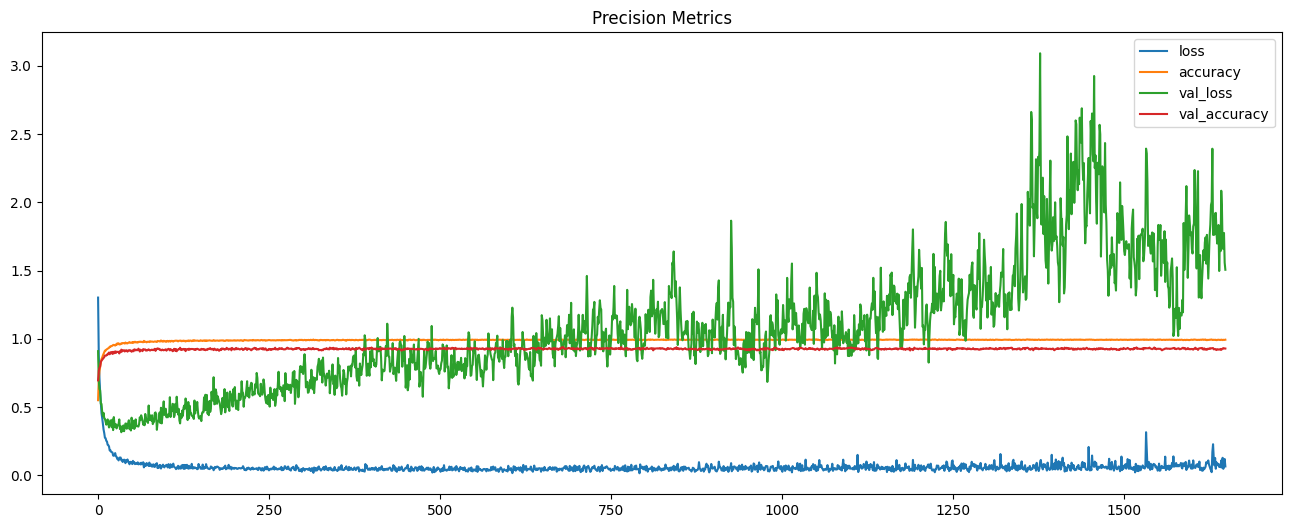

In [43]:
plotValidate(model_history)

In [66]:
model.save("/Volumes/Adithya KP Main/Adithya KP/5th Sem BE/PW Machine Learning/model.h5")

Inference

In [ ]:
input_file_path = ("")

In [84]:
print(X_test[0])
yhat = model.predict(X_test[10:11])
yhat = np.argmax(yhat, axis = 1)
#[print(x if x > 5 else 0) for x in yhat]
#print([*yhat])
print(yhat)
print(len(yhat))

np.sum(yhat == y_test)/len(yhat)

[ 0.         -0.73906375  0.89207599 -0.18443948 -0.36421935 -1.37427199
 -0.808654   -1.52350577 -0.92537055 -1.49155871 -0.88757578 -1.10333863
 -0.62399704  0.20657783 -0.19751751  0.38564681 -0.57159047 -0.38105596
 -0.32982041 -0.40773151  1.87159374  0.05720172 -0.91569399 -0.24650413
 -0.20030475  3.20010326  0.38312333  1.67004634 -1.09438184 -0.12233067
  0.19750218  2.44467051 -1.23748985 -0.1116075   0.6699828   1.45145113
 -1.58577114  2.6642783  -0.90912094  0.2786215  -0.7754874  -0.10845808
 -0.68144278 -0.05698145 -1.19593146  0.1472316  -0.31028158 -0.5189099
 -0.84846536 -0.31089918 -0.0693085  -0.04696638 -1.84824799 -0.44523426
 -1.16265976 -0.42600506 -1.58145293  0.12920527]
1/1 [==============================] - 0s 31ms/step
[6]
1


182.0